In [13]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 1. Load the dataset and perform exploratory data analysis (EDA): 

a. Import the necessary libraries (pandas, numpy, matplotlib, seaborn) 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

b. Load the dataset using pandas and display the first few rows 

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/ArinB/MSBA-CA-Data/main/CA06/Mall_Customers.csv')

c. Check for missing values and handle them appropriately

In [6]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

d. Visualize the distribution of features using histograms or boxplots

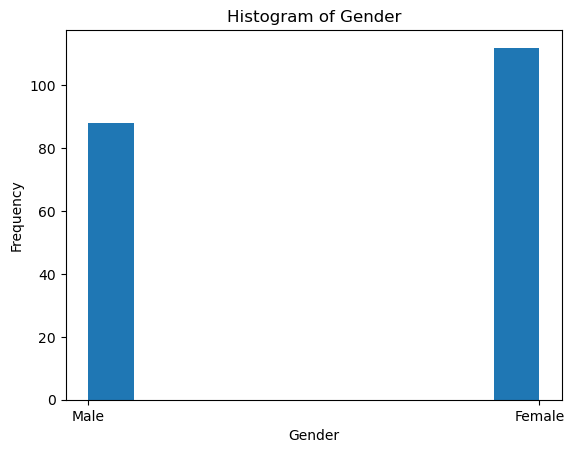

In [7]:
plt.hist(df['Genre'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Histogram of Gender')
plt.show()

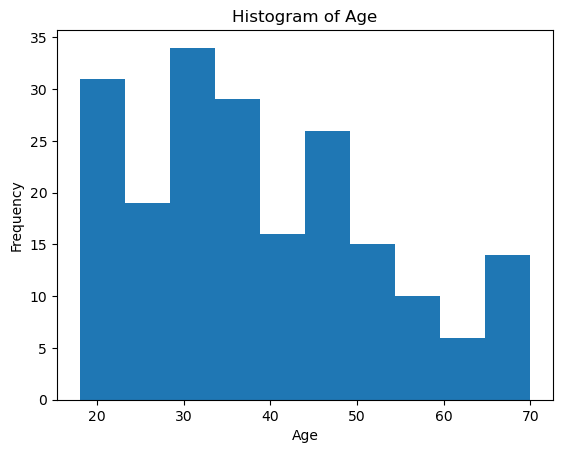

In [8]:
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

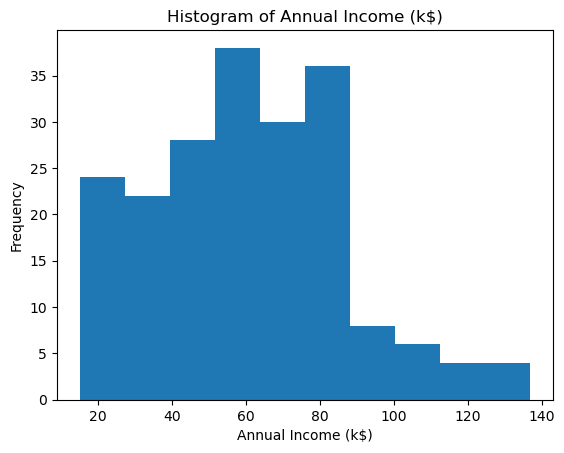

In [9]:
plt.hist(df['Annual Income (k$)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Income (k$)')
plt.show()

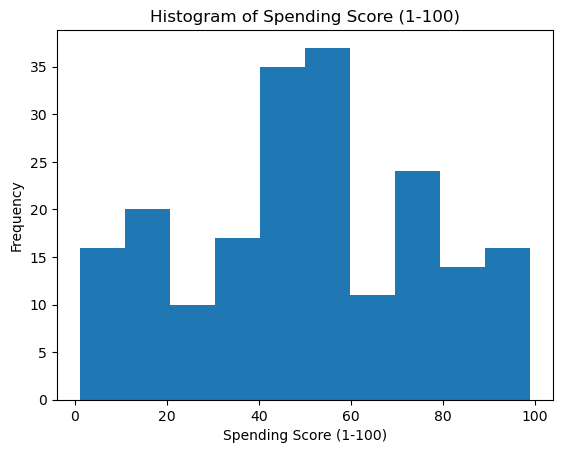

In [10]:
plt.hist(df['Spending Score (1-100)'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.title('Histogram of Spending Score (1-100)')
plt.show()

# 2. Prepare the data for clustering: 

a. Perform any necessary feature scaling
(StandardScaler or MinMaxScaler) 

In [17]:
dummy_var = pd.get_dummies(df['Genre'])

# Concatenate the dummy variable with the original DataFrame
data = pd.concat([df, dummy_var], axis=1)
data = data.drop(['Genre', 'Male'], axis=1)

In [18]:
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1
...,...,...,...,...,...
195,196,35,120,79,1
196,197,45,126,28,1
197,198,32,126,74,0
198,199,32,137,18,0


In [20]:
scaler = StandardScaler()
df_scaled_std = scaler.fit_transform(data)

In [23]:
df_scaled_std

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148, -1.12815215],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407, -1.12815215],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298,  0.88640526],
       [-1.67144992, -1.13750203, -1.70082976,  1.04041783,  0.88640526],
       [-1.6541292 , -0.56336851, -1.66266033, -0.39597992,  0.88640526],
       [-1.63680847, -1.20926872, -1.66266033,  1.00159627,  0.88640526],
       [-1.61948775, -0.27630176, -1.62449091, -1.71591298,  0.88640526],
       [-1.60216702, -1.13750203, -1.62449091,  1.70038436,  0.88640526],
       [-1.5848463 ,  1.80493225, -1.58632148, -1.83237767, -1.12815215],
       [-1.56752558, -0.6351352 , -1.58632148,  0.84631002,  0.88640526],
       [-1.55020485,  2.02023231, -1.58632148, -1.4053405 , -1.12815215],
       [-1.53288413, -0.27630176, -1.58632148,  1.89449216,  0.88640526],
       [-1.5155634 ,  1.37433211, -1.54815205, -1.36651894,  0.88640526],
       [-1.49824268, -1.06573534, -1.5

b. Choose the appropriate features for
clustering (you may start with 'Annual Income' and 'Spending Score') 

In [43]:
cols = data.columns
df2 = pd.DataFrame(df_scaled_std,columns=cols)

In [44]:
df2

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female
0,-1.723412,-1.424569,-1.738999,-0.434801,-1.128152
1,-1.706091,-1.281035,-1.738999,1.195704,-1.128152
2,-1.688771,-1.352802,-1.700830,-1.715913,0.886405
3,-1.671450,-1.137502,-1.700830,1.040418,0.886405
4,-1.654129,-0.563369,-1.662660,-0.395980,0.886405
...,...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061,0.886405
196,1.671450,0.441365,2.497807,-0.861839,0.886405
197,1.688771,-0.491602,2.497807,0.923953,-1.128152
198,1.706091,-0.491602,2.917671,-1.250054,-1.128152


c. Create a new DataFrame with only the selected features

In [46]:
finalDF = df2[['Annual Income (k$)','Spending Score (1-100)']]

# 3. Implement k-means clustering: 

a. Import the KMeans class from the sklearn.cluster module

In [32]:
from sklearn.cluster import KMeans

b. Use the Silhouette Method to determine the optimal
number of clusters

In [47]:
from sklearn.metrics import silhouette_score
import pandas as pd

# Load the data into a Pandas DataFrame

# Create a range of K values to test
k_values = range(2, 10)

# For each K value, calculate the silhouette score
for k in k_values:
    # Fit K-means clustering on the data with K clusters
    kmeans = KMeans(n_clusters=k).fit(finalDF)
    
    # Calculate the average silhouette score for the clustering
    score = silhouette_score(finalDF, kmeans.labels_)
    
    # Print the silhouette score
    print("For K = {}, the silhouette score is {}".format(k, score))


For K = 2, the silhouette score is 0.29512063001659344
For K = 3, the silhouette score is 0.46658474419000145
For K = 4, the silhouette score is 0.4939069237513199
For K = 5, the silhouette score is 0.5546571631111091
For K = 6, the silhouette score is 0.5394911417553498
For K = 7, the silhouette score is 0.5281492781108291
For K = 8, the silhouette score is 0.4541279523637649
For K = 9, the silhouette score is 0.458601045681428


c. Train the KMeans model with the optimal number of
clusters

In [48]:
from sklearn.cluster import KMeans

# Instantiate the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=5)

# Train the KMeans model on the data
kmeans.fit(finalDF)

# Get the cluster labels for each data point
labels = kmeans.labels_


 d. Obtain the cluster assignments for each data point

In [49]:
cluster_assignments = kmeans.predict(finalDF)
cluster_assignments

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

# 4. Visualize and analyze the clusters: 

a. Create a scatter plot of the selected features,
colored by cluster assignment

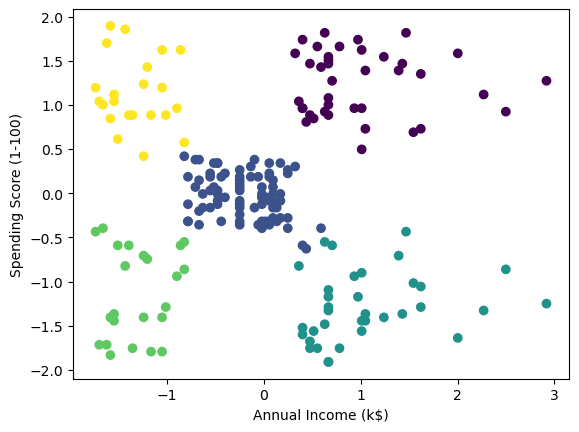

In [50]:
# Create a scatter plot of the selected features, colored by cluster assignment
plt.scatter(finalDF['Annual Income (k$)'], finalDF['Spending Score (1-100)'], c=cluster_assignments)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


 b. Interpret the clusters and provide a brief 
description of each cluster 

Cluster 1 (light green): low annual income and low spending score. Low Income/lower class. 

Cluster 2 (teal): high annual income and low spending score. Frugal people, budget conscious. 

Cluster 3 (navy blue): average income and average spending score: Middle Class. 

Cluster 4 (yellow): low annual income high spending score. Financially irresponsible. Need to take financial literacy classes. 

Cluster 5 (purple): high annual income and high spending score. Upper class. Have the money to spend. 

c. (Optional) Perform the same analysis with different
sets of features and compare the results

In [51]:
finalDFAge = df2[['Age','Spending Score (1-100)']]
finalDFGender = df2[['Female','Spending Score (1-100)']]

In [54]:
#for age and spending score

# Instantiate the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=5)

# Train the KMeans model on the data
kmeans.fit(finalDFAge)

# Get the cluster labels for each data point
labelsAge = kmeans.labels_

cluster_assignmentsAge = kmeans.predict(finalDFAge)
cluster_assignmentsAge

array([0, 3, 2, 3, 0, 3, 2, 3, 1, 3, 1, 3, 1, 3, 2, 3, 2, 0, 1, 3, 2, 3,
       1, 3, 1, 3, 2, 0, 2, 3, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3, 4, 3, 4, 0,
       1, 0, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 0,
       4, 4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 0, 0, 4, 4, 0, 4, 4, 0, 4, 4, 0,
       0, 4, 4, 0, 4, 2, 0, 0, 4, 0, 4, 0, 0, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       4, 0, 2, 0, 0, 0, 4, 4, 4, 4, 0, 2, 0, 3, 0, 3, 2, 3, 1, 3, 1, 3,
       0, 3, 2, 3, 1, 3, 2, 3, 1, 3, 0, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 4, 3, 2, 3, 1, 3, 2, 3, 2, 0, 2, 3, 2, 3, 1, 3,
       1, 3, 1, 3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3,
       2, 3], dtype=int32)

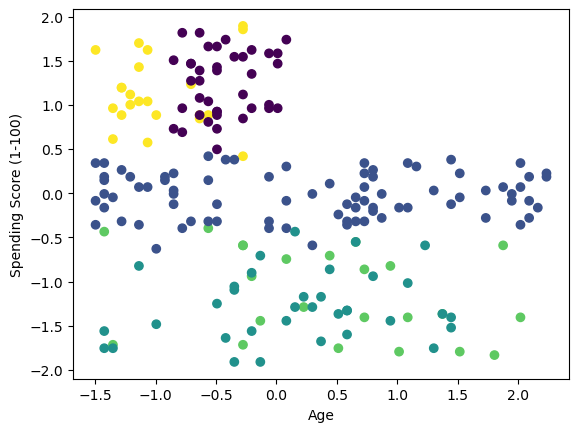

In [59]:
# Create a scatter plot of the selected features, colored by cluster assignment
plt.scatter(finalDFAge['Age'], finalDFAge['Spending Score (1-100)'], c=cluster_assignments)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [55]:
#for age and spending score

# Instantiate the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=5)

# Train the KMeans model on the data
kmeans.fit(finalDFGender)

# Get the cluster labels for each data point
labelsGender = kmeans.labels_

cluster_assignmentsGender = kmeans.predict(finalDFGender)
cluster_assignmentsGender

array([2, 4, 3, 1, 3, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 4, 3, 2, 0, 1, 2, 4,
       3, 4, 3, 4, 3, 2, 3, 1, 0, 1, 0, 4, 3, 1, 3, 1, 3, 1, 3, 4, 2, 1,
       3, 1, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 1, 2, 2,
       3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 1, 2, 1, 3,
       1, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2,
       2, 3, 3, 2, 3, 3, 3, 1, 3, 1, 2, 3, 1, 4, 3, 1, 2, 4, 0, 4, 0, 4,
       3, 1, 0, 1, 3, 4, 0, 1, 3, 4, 3, 1, 0, 4, 2, 1, 3, 4, 0, 4, 3, 1,
       3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 3, 2, 0, 4, 0, 4, 3, 1,
       0, 4, 0, 4, 3, 1, 0, 1, 3, 4, 3, 4, 3, 1, 3, 1, 0, 1, 3, 1, 3, 4,
       0, 4], dtype=int32)

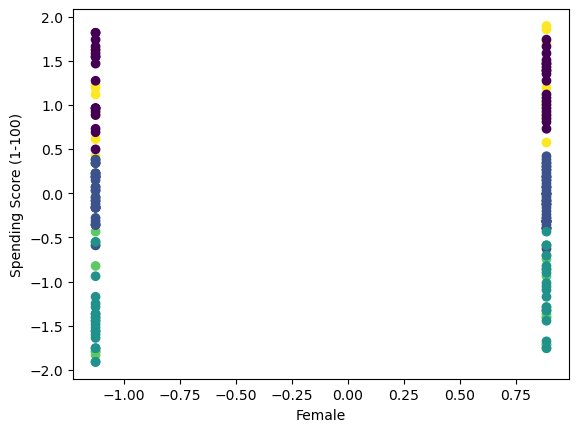

In [58]:
# Create a scatter plot of the selected features, colored by cluster assignment
plt.scatter(finalDFGender['Female'], finalDFGender['Spending Score (1-100)'], c=cluster_assignments)
plt.xlabel('Female')
plt.ylabel('Spending Score (1-100)')
plt.show()

# 5. Write a report summarizing your findings:

a. Describe the dataset and its
attributes

The dataset describes customers spending habits and their different factors such as age, gender, and income. 

The columns in the data are: 

1. CustomerID: A unique ID for each customer in the dataset. 

2. Age: The age of the customer.

3. Annual Income (k$): The annual income of the customer in thousands of dollars. 

4. Spending Score (1-100): A score assigned to each customer based on their past spending behavior. 

5. Female: The gender of the customer. 1 = Female, 0 = Male. 

b. Detail the steps taken for data preprocessing, feature selection, and
scaling 

For data preprocessing, I checked to see if there were any missing or null values and then removed them. I then created a dummy variable for gender called Female with a 1 and 0 value indicating 1=Female, 0=Male. After this I dropped the original Gender column and then scaled the remaining colums using the standard scaler. For feature selection, I chose to focus on the two features that I believed had the most correlation with each other wihch was just spending and annual income. 

c. Explain the process of determining the optimal number of clusters

We used the silhoutte method to identify which value for clusters from 2-10 had the highest silhoutte score which indicates how similar datapoints are inside of each cluster to other points in the cluster. 

d.Describe the clusters and their characteristics

Cluster 1 (light green): low annual income and low spending score. Low Income/lower class.

Cluster 2 (teal): high annual income and low spending score. Frugal people, budget conscious.

Cluster 3 (navy blue): average income and average spending score: Middle Class.

Cluster 4 (yellow): low annual income high spending score. Financially irresponsible. Need to take financial literacy classes.

Cluster 5 (purple): high annual income and high spending score. Upper class. Have the money to spend.

When I looked at the other variables and spending score, the clustering did not work as well because the values were binary (female/male) and discrete (age). Because of this it was difficult to see the clusters as seen i the cluster maps for these variables. 